In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig_name = "nucleotide_v_qscore_rmsf"
figsize = (8,3)
linewidth = 2
domainwidth = 20
ticksize = 12
labelsize = 14
dpi = 400
QcolorA = "blue"
QcolorB = "lightblue"
RMSFcolor = "darkorange"
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
df = pd.read_csv("per_residue_summary.csv")

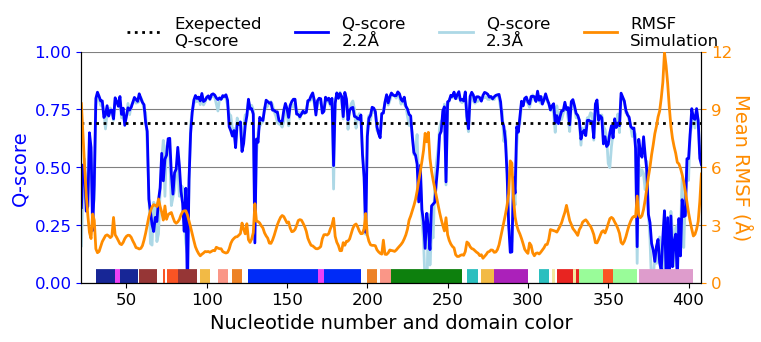

In [4]:
fig, ax1 = plt.subplots(figsize=figsize)
ax2 = ax1.twinx()

g2 = sns.lineplot(data=df,x="residue_number",y="Qscore 2.3A",color=QcolorB ,ax=ax1,linewidth=linewidth)
g1 = sns.lineplot(data=df,x="residue_number",y="Qscore 2.2A",color=QcolorA ,ax=ax1,linewidth=linewidth)
res=2.2
expected_q=(-0.138*res)+0.997
h1 = ax1.hlines(expected_q,df["residue_number"].min(),df["residue_number"].max(),linestyle=":",color="black",linewidth=linewidth)
ax1.set_xlim(df["residue_number"].min(),df["residue_number"].max())
gN = sns.lineplot(data=df,x="residue_number",y="RMSF",color=RMSFcolor ,ax=ax2,linewidth=linewidth)


width = domainwidth 
#P2.1 -- changed
ax1.hlines(0,58,69,color=(0.59,0.21,0.21),linewidth=width)
ax1.hlines(0,82,94,color=(0.59,0.21,0.21),linewidth=width)
#P2
ax1.hlines(0,31,43,color=(0.09,0.15,0.59),linewidth=width)
ax1.hlines(0,46,57,color=(0.09,0.15,0.59),linewidth=width)
#P3
ax1.hlines(0,271,279,color=(0.95,0.73,0.27),linewidth=width)
ax1.hlines(0,96,102,color=(0.95,0.73,0.27),linewidth=width)
#P4 -- changed
ax1.hlines(0,107,113,color=(0.98,0.59,0.53),linewidth=width)
ax1.hlines(0,208,215,color=(0.98,0.59,0.53),linewidth=width)
#P5
ax1.hlines(0,116,122,color=(0.93,0.51,0.15),linewidth=width)
ax1.hlines(0,200,206,color=(0.93,0.51,0.15),linewidth=width)
#P5abc -- changed
ax1.hlines(0,126,169,color=(0.00,0.17,0.97),linewidth=width)
ax1.hlines(0,173,196,color=(0.00,0.17,0.97),linewidth=width)
#P6 -- changed
ax1.hlines(0,215,259,color=(0.05,0.50,0.05),linewidth=width)
#P7 -- changed
ax1.hlines(0,262,269,color=(0.17,0.75,0.75),linewidth=width)
ax1.hlines(0,307,313,color=(0.17,0.75,0.75),linewidth=width)
#P8
ax1.hlines(0,279,300,color=(0.67,0.13,0.73),linewidth=width)
#P9
ax1.hlines(0,318,332,color=(0.91,0.14,0.13),linewidth=width)
#P9.1 -- changed
ax1.hlines(0,353,368,color=(0.60,0.99,0.60),linewidth=width)
ax1.hlines(0,332,347,color=(0.60,0.99,0.60),linewidth=width)
#P9.2 -- changed
ax1.hlines(0,369,403,color=(0.87,0.61,0.80),linewidth=width)
#P9a -- changed
ax1.hlines(0,315,317,color=(0.95,0.91,0.63),linewidth=width)
ax1.hlines(0,328,330,color=(0.95,0.91,0.63),linewidth=width)
#P13 -- changed
ax1.hlines(0,347,353,color=(0.98,0.33,0.14),linewidth=width)
ax1.hlines(0,75,82,color=(0.98,0.33,0.14),linewidth=width)
ax1.hlines(0,73,74,color=(0.98,0.33,0.14),linewidth=width)
#P14 -- changed
ax1.hlines(0,43,46,color=(0.93,0.25,0.96),linewidth=width)
ax1.hlines(0,169,173,color=(0.93,0.25,0.96),linewidth=width)

ax2.set_ylim(0.5,12)
ax1.set_ylim(0,0.9)

ax1.get_yaxis().set_ticks([0.00,0.25,0.50,0.75,1.0])
ax2.get_yaxis().set_ticks([0,3,6,9,12])
# color y axis
ax1.yaxis.label.set_color(QcolorA)
ax2.yaxis.label.set_color(RMSFcolor)

ax1.tick_params(axis='x', labelsize=ticksize)
ax2.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("Nucleotide number and domain color",size=labelsize)
ax1.set_ylabel("Q-score",size=labelsize,color=QcolorA) 
ax2.set_ylabel("Mean RMSF (Å)",rotation=270,labelpad=labelsize,size=labelsize,color=RMSFcolor)
ax1.tick_params(axis='y', colors=QcolorA,labelsize=ticksize)
ax2.tick_params(axis='y', colors=RMSFcolor,labelsize=ticksize)
ax1.yaxis.grid(which='major', linestyle='-',  color='grey')
ax1.legend([h1,g1.get_lines()[1],g1.get_lines()[0],gN.get_lines()[0]],["Exepected\nQ-score","Q-score\n2.2Å","Q-score\n2.3Å","RMSF\nSimulation"],
           loc="upper left",ncol=4,fontsize=ticksize,frameon=False, bbox_to_anchor=(0.05,1.22))
plt.savefig(f"{fig_name}.png",dpi=dpi,bbox_inches="tight",transparent=True)
plt.savefig(f"{fig_name}.svg",bbox_inches="tight",transparent=True)